In [1]:
import subprocess

def extract_audio_samples(input_file):
    ffmpeg_cmd = [
        "ffmpeg", "-i", input_file, 
        "-f", "s16le", "-acodec", "pcm_s16le", "-"  # Output raw audio samples to stdout
    ]

    result = subprocess.run(ffmpeg_cmd, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL, check=True)
    return result.stdout  # Raw audio data

# Example usage:
input_file = "C:\\Users\\jay_m\\Downloads\\LGTVG42024_VoiceOver_ORIGINAL.mp3"
data = extract_audio_samples(input_file)

In [2]:
no_channels = 2

channels = [[] for _ in range(no_channels)]

i = 0
while i < len(data):
    for j in range(no_channels):
        sample = data[i] | (data[i + 1] << 8)
        if sample >= 0x8000:
            sample -= 0x10000
        channels[j].append(sample)
        i += 2

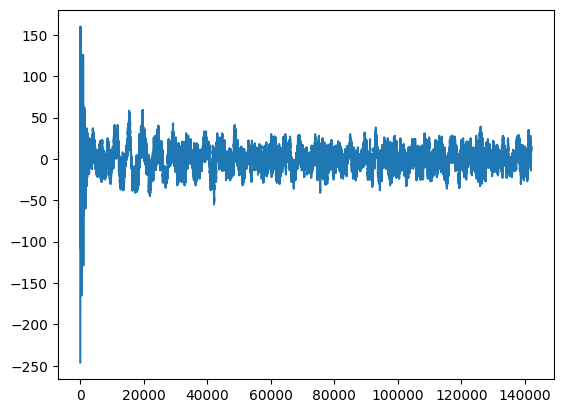

In [13]:
import matplotlib.pyplot as plt


start = 48000*31 + 20000
end = 48000*35 - 30000
plt.plot(channels[1][start:end])